In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def DaskProfReader(filename):
    filename = open(filename,'r')
    timestamps=list()
    for line in filename:
        for item in line.split():
            if item.startswith('start_time'):
                timestamp1=float(item.split('=')[1].split(',')[0])
            elif item.startswith('end_time'):
                timestamp2=float(item.split('=')[1].split(',')[0])
        timestamps.append([timestamp1,timestamp2])
    
    filename.close()
    
    return np.array(timestamps)

def SchedulerDelay(profiles,measure='start'):
    delays = np.array([])
    if measure == 'end':
        index = 1
    else:
        index = 0
    for profile in profiles:
        start_times = profile[:,index]
        start_times.sort()
        start_times = start_times-start_times[0]
        delays = np.append(delays,start_times[0:-1])
        
    return delays

def SchedulerDelayDist(profiles,measure='start'):
    delays = np.array([])
    if measure == 'end':
        index = 1
    else:
        index = 0
    
    for profile in profiles:
        times = profile[1][:,index]
        times.sort()
        times = times-times[0]
        delays = np.append(delays,times)
    
    return delays

def TaskPerSecHist(array,unit=1):
    exps = array.shape[0]
    temp = list()
    maxlen=0
    for i in range(0,exps):
        c =[0]
        sec = 1
        for j in range(1,array.shape[1]):
            if array[i,j-1]<(sec*unit):
                c[sec-1]+=1
            else:
                sec+=1
                c.append(1)
        if len(c)> maxlen:
            maxlen=len(c)
        temp.append(c)
        
    hists = np.zeros((exps,maxlen))
    for i in range(0,exps):
        hists[i,0:len(temp[i])]=temp[i]
    
    return hists


In [3]:
# Dask Distributed Comet 20 cores
Cprofiles20_dist_1p_1=list()
Cprofiles20_dist_2p_1=list()
Cprofiles20_dist_4p_1=list()
Cprofiles20_dist_5p_1=list()
Cprofiles20_dist_10p_1=list()
Cprofiles20_dist_20p_1=list()

Cprofiles20_dist_1p_2=list()
Cprofiles20_dist_2p_2=list()
Cprofiles20_dist_4p_2=list()
Cprofiles20_dist_5p_2=list()
Cprofiles20_dist_10p_2=list()
Cprofiles20_dist_20p_2=list()

Cprofiles20_dist_1p_3=list()
Cprofiles20_dist_2p_3=list()
Cprofiles20_dist_4p_3=list()
Cprofiles20_dist_5p_3=list()
Cprofiles20_dist_10p_3=list()
Cprofiles20_dist_20p_3=list()

Cprofiles20_dist_1p_4=list()
Cprofiles20_dist_2p_4=list()
Cprofiles20_dist_4p_4=list()
Cprofiles20_dist_5p_4=list()
Cprofiles20_dist_10p_4=list()
Cprofiles20_dist_20p_4=list()


for i in range(0,10):
    Cprofiles20_dist_1p_1.append(np.load('Comet/1node20procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_2p_1.append(np.load('Comet/1node20procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_4p_1.append(np.load('Comet/1node20procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_5p_1.append(np.load('Comet/1node20procs/timings_5p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_10p_1.append(np.load('Comet/1node20procs/timings_10p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_20p_1.append(np.load('Comet/1node20procs/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles20_dist_1p_2.append(np.load('Comet/2nodes20procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_2p_2.append(np.load('Comet/2nodes20procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_4p_2.append(np.load('Comet/2nodes20procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_5p_2.append(np.load('Comet/2nodes20procs/timings_5p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_10p_2.append(np.load('Comet/2nodes20procs/timings_10p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_20p_2.append(np.load('Comet/2nodes20procs/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles20_dist_1p_3.append(np.load('Comet/3nodes20procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_2p_3.append(np.load('Comet/3nodes20procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_4p_3.append(np.load('Comet/3nodes20procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_5p_3.append(np.load('Comet/3nodes20procs/timings_5p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_10p_3.append(np.load('Comet/3nodes20procs/timings_10p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_20p_3.append(np.load('Comet/3nodes20procs/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles20_dist_1p_4.append(np.load('Comet/4nodes20procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_2p_4.append(np.load('Comet/4nodes20procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_4p_4.append(np.load('Comet/4nodes20procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_5p_4.append(np.load('Comet/4nodes20procs/timings_5p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_10p_4.append(np.load('Comet/4nodes20procs/timings_10p_%02d.npz.npy'%(i+1)))
    Cprofiles20_dist_20p_4.append(np.load('Comet/4nodes20procs/timings_20p_%02d.npz.npy'%(i+1)))

In [4]:
# Dask Distributed Comet 24 cores
Cprofiles24_dist_1p_1=list()
Cprofiles24_dist_2p_1=list()
Cprofiles24_dist_3p_1=list()
Cprofiles24_dist_4p_1=list()
Cprofiles24_dist_6p_1=list()
Cprofiles24_dist_8p_1=list()
Cprofiles24_dist_12p_1=list()
Cprofiles24_dist_24p_1=list()

Cprofiles24_dist_1p_2=list()
Cprofiles24_dist_2p_2=list()
Cprofiles24_dist_3p_2=list()
Cprofiles24_dist_4p_2=list()
Cprofiles24_dist_6p_2=list()
Cprofiles24_dist_8p_2=list()
Cprofiles24_dist_12p_2=list()
Cprofiles24_dist_24p_2=list()

Cprofiles24_dist_1p_3=list()
Cprofiles24_dist_2p_3=list()
Cprofiles24_dist_3p_3=list()
Cprofiles24_dist_4p_3=list()
Cprofiles24_dist_6p_3=list()
Cprofiles24_dist_8p_3=list()
Cprofiles24_dist_12p_3=list()
Cprofiles24_dist_24p_3=list()

Cprofiles24_dist_1p_4=list()
Cprofiles24_dist_2p_4=list()
Cprofiles24_dist_3p_4=list()
Cprofiles24_dist_4p_4=list()
Cprofiles24_dist_6p_4=list()
Cprofiles24_dist_8p_4=list()
Cprofiles24_dist_12p_4=list()
Cprofiles24_dist_24p_4=list()


for i in range(0,10):
    Cprofiles24_dist_1p_1.append(np.load('Comet/1node24procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_2p_1.append(np.load('Comet/1node24procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_3p_1.append(np.load('Comet/1node24procs/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_4p_1.append(np.load('Comet/1node24procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_6p_1.append(np.load('Comet/1node24procs/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_8p_1.append(np.load('Comet/1node24procs/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_12p_1.append(np.load('Comet/1node24procs/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_24p_1.append(np.load('Comet/1node24procs/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles24_dist_1p_2.append(np.load('Comet/2nodes24procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_2p_2.append(np.load('Comet/2nodes24procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_3p_2.append(np.load('Comet/2nodes24procs/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_4p_2.append(np.load('Comet/2nodes24procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_6p_2.append(np.load('Comet/2nodes24procs/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_8p_2.append(np.load('Comet/2nodes24procs/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_12p_2.append(np.load('Comet/2nodes24procs/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_24p_2.append(np.load('Comet/2nodes24procs/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles24_dist_1p_3.append(np.load('Comet/3nodes24procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_2p_3.append(np.load('Comet/3nodes24procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_3p_3.append(np.load('Comet/3nodes24procs/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_4p_3.append(np.load('Comet/3nodes24procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_6p_3.append(np.load('Comet/3nodes24procs/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_8p_3.append(np.load('Comet/3nodes24procs/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_12p_3.append(np.load('Comet/3nodes24procs/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_24p_3.append(np.load('Comet/3nodes24procs/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles24_dist_1p_4.append(np.load('Comet/4nodes24procs/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_2p_4.append(np.load('Comet/4nodes24procs/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_3p_4.append(np.load('Comet/4nodes24procs/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_4p_4.append(np.load('Comet/4nodes24procs/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_6p_4.append(np.load('Comet/4nodes24procs/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_8p_4.append(np.load('Comet/4nodes24procs/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_12p_4.append(np.load('Comet/4nodes24procs/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles24_dist_24p_4.append(np.load('Comet/4nodes24procs/timings_24p_%02d.npz.npy'%(i+1)))

In [5]:
# Dask Distributed SuperMic
Sprofiles_dist_1p_1=list()
Sprofiles_dist_2p_1=list()
Sprofiles_dist_4p_1=list()
Sprofiles_dist_5p_1=list()
Sprofiles_dist_10p_1=list()
Sprofiles_dist_20p_1=list()

Sprofiles_dist_1p_2=list()
Sprofiles_dist_2p_2=list()
Sprofiles_dist_4p_2=list()
Sprofiles_dist_5p_2=list()
Sprofiles_dist_10p_2=list()
Sprofiles_dist_20p_2=list()

Sprofiles_dist_1p_3=list()
Sprofiles_dist_2p_3=list()
Sprofiles_dist_4p_3=list()
Sprofiles_dist_5p_3=list()
Sprofiles_dist_10p_3=list()
Sprofiles_dist_20p_3=list()

Sprofiles_dist_1p_4=list()
Sprofiles_dist_2p_4=list()
Sprofiles_dist_4p_4=list()
Sprofiles_dist_5p_4=list()
Sprofiles_dist_10p_4=list()
Sprofiles_dist_20p_4=list()


for i in range(0,10):
    Sprofiles_dist_1p_1.append(np.load('SuperMic/1node/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_1.append(np.load('SuperMic/1node/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_1.append(np.load('SuperMic/1node/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_1.append(np.load('SuperMic/1node/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_1.append(np.load('SuperMic/1node/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_1.append(np.load('SuperMic/1node/timings_20p_%02d.npz.npy'%(i+1)))
    
for i in range(0,10):
    Sprofiles_dist_1p_2.append(np.load('SuperMic/2nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_2.append(np.load('SuperMic/2nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_2.append(np.load('SuperMic/2nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_2.append(np.load('SuperMic/2nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_2.append(np.load('SuperMic/2nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_2.append(np.load('SuperMic/2nodes/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Sprofiles_dist_1p_3.append(np.load('SuperMic/3nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_3.append(np.load('SuperMic/3nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_3.append(np.load('SuperMic/3nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_3.append(np.load('SuperMic/3nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_3.append(np.load('SuperMic/3nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_3.append(np.load('SuperMic/3nodes/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Sprofiles_dist_1p_4.append(np.load('SuperMic/4nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_4.append(np.load('SuperMic/4nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_4.append(np.load('SuperMic/4nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_4.append(np.load('SuperMic/4nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_4.append(np.load('SuperMic/4nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_4.append(np.load('SuperMic/4nodes/timings_20p_%02d.npz.npy'%(i+1)))


In [6]:
# Dask Distributed Comet 24 procs
DistHistC24_1p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_1p_1,measure='end').reshape(10,100000))
DistHistC24_2p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_2p_1,measure='end').reshape(10,100000))
DistHistC24_3p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_3p_1,measure='end').reshape(10,100000))
DistHistC24_4p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_4p_1,measure='end').reshape(10,100000))
DistHistC24_6p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_6p_1,measure='end').reshape(10,100000))
DistHistC24_8p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_8p_1,measure='end').reshape(10,100000))
DistHistC24_12p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_12p_1,measure='end').reshape(10,100000))
DistHistC24_24p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_24p_1,measure='end').reshape(10,100000))

DistHistC24_1p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_1p_2,measure='end').reshape(10,100000))
DistHistC24_2p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_2p_2,measure='end').reshape(10,100000))
DistHistC24_3p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_3p_2,measure='end').reshape(10,100000))
DistHistC24_4p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_4p_2,measure='end').reshape(10,100000))
DistHistC24_6p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_6p_2,measure='end').reshape(10,100000))
DistHistC24_8p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_8p_2,measure='end').reshape(10,100000))
DistHistC24_12p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_12p_2,measure='end').reshape(10,100000))
DistHistC24_24p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_24p_2,measure='end').reshape(10,100000))

DistHistC24_1p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_1p_3,measure='end').reshape(10,100000))
DistHistC24_2p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_2p_3,measure='end').reshape(10,100000))
DistHistC24_3p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_3p_3,measure='end').reshape(10,100000))
DistHistC24_4p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_4p_3,measure='end').reshape(10,100000))
DistHistC24_6p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_6p_3,measure='end').reshape(10,100000))
DistHistC24_8p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_8p_3,measure='end').reshape(10,100000))
DistHistC24_12p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_12p_3,measure='end').reshape(10,100000))
DistHistC24_24p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_24p_3,measure='end').reshape(10,100000))

DistHistC24_1p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_1p_4,measure='end').reshape(10,100000))
DistHistC24_2p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_2p_4,measure='end').reshape(10,100000))
DistHistC24_3p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_3p_4,measure='end').reshape(10,100000))
DistHistC24_4p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_4p_4,measure='end').reshape(10,100000))
DistHistC24_6p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_6p_4,measure='end').reshape(10,100000))
DistHistC24_8p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_8p_4,measure='end').reshape(10,100000))
DistHistC24_12p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_12p_4,measure='end').reshape(10,100000))
DistHistC24_24p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles24_dist_24p_4,measure='end').reshape(10,100000))


In [7]:
# Dask Distributed Comet 20 procs
DistHistC20_1p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_1p_1,measure='end').reshape(10,100000))
DistHistC20_2p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_2p_1,measure='end').reshape(10,100000))
DistHistC20_4p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_4p_1,measure='end').reshape(10,100000))
DistHistC20_5p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_5p_1,measure='end').reshape(10,100000))
DistHistC20_10p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_10p_1,measure='end').reshape(10,100000))
DistHistC20_20p_1 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_20p_1,measure='end').reshape(10,100000))

DistHistC20_1p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_1p_2,measure='end').reshape(10,100000))
DistHistC20_2p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_2p_2,measure='end').reshape(10,100000))
DistHistC20_4p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_4p_2,measure='end').reshape(10,100000))
DistHistC20_5p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_5p_2,measure='end').reshape(10,100000))
DistHistC20_10p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_10p_2,measure='end').reshape(10,100000))
DistHistC20_20p_2 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_20p_2,measure='end').reshape(10,100000))

DistHistC20_1p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_1p_3,measure='end').reshape(10,100000))
DistHistC20_2p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_2p_3,measure='end').reshape(10,100000))
DistHistC20_4p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_4p_3,measure='end').reshape(10,100000))
DistHistC20_5p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_5p_3,measure='end').reshape(10,100000))
DistHistC20_10p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_10p_3,measure='end').reshape(10,100000))
DistHistC20_20p_3 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_20p_3,measure='end').reshape(10,100000))

DistHistC20_1p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_1p_4,measure='end').reshape(10,100000))
DistHistC20_2p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_2p_4,measure='end').reshape(10,100000))
DistHistC20_4p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_4p_4,measure='end').reshape(10,100000))
DistHistC20_5p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_5p_4,measure='end').reshape(10,100000))
DistHistC20_10p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_10p_4,measure='end').reshape(10,100000))
DistHistC20_20p_4 = TaskPerSecHist(SchedulerDelayDist(Cprofiles20_dist_20p_4,measure='end').reshape(10,100000))


In [8]:
# Dask Distributed SuperMic
DistHistS_1p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_1p_1,measure='end').reshape(10,100000))
DistHistS_2p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_2p_1,measure='end').reshape(10,100000))
DistHistS_4p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_4p_1,measure='end').reshape(10,100000))
DistHistS_5p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_5p_1,measure='end').reshape(10,100000))
DistHistS_10p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_10p_1,measure='end').reshape(10,100000))
DistHistS_20p_1 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_20p_1,measure='end').reshape(10,100000))

DistHistS_1p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_1p_2,measure='end').reshape(10,100000))
DistHistS_2p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_2p_2,measure='end').reshape(10,100000))
DistHistS_4p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_4p_2,measure='end').reshape(10,100000))
DistHistS_5p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_5p_2,measure='end').reshape(10,100000))
DistHistS_10p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_10p_2,measure='end').reshape(10,100000))
DistHistS_20p_2 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_20p_2,measure='end').reshape(10,100000))

DistHistS_1p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_1p_3,measure='end').reshape(10,100000))
DistHistS_2p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_2p_3,measure='end').reshape(10,100000))
DistHistS_4p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_4p_3,measure='end').reshape(10,100000))
DistHistS_5p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_5p_3,measure='end').reshape(10,100000))
DistHistS_10p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_10p_3,measure='end').reshape(10,100000))
DistHistS_20p_3 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_20p_3,measure='end').reshape(10,100000))

DistHistS_1p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_1p_4,measure='end').reshape(10,100000))
DistHistS_2p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_2p_4,measure='end').reshape(10,100000))
DistHistS_4p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_4p_4,measure='end').reshape(10,100000))
DistHistS_5p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_5p_4,measure='end').reshape(10,100000))
DistHistS_10p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_10p_4,measure='end').reshape(10,100000))
DistHistS_20p_4 = TaskPerSecHist(SchedulerDelayDist(Sprofiles_dist_20p_4,measure='end').reshape(10,100000))


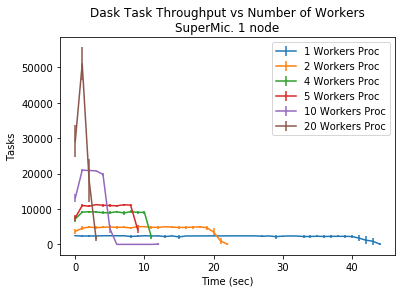

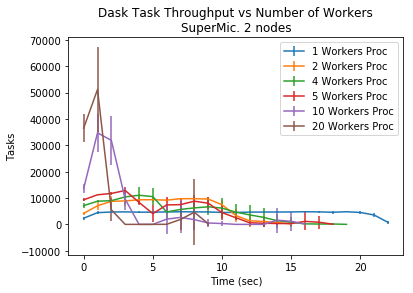

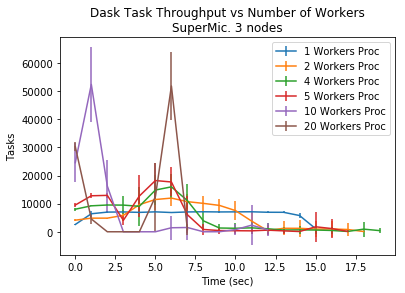

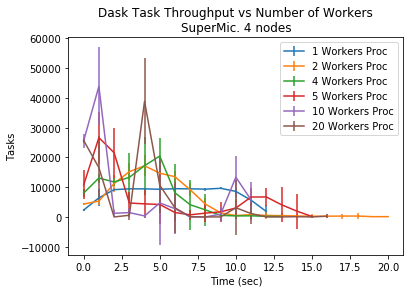

In [9]:
plt.figure()
plt.errorbar(range(0,DistHistS_1p_1.shape[1]),DistHistS_1p_1.mean(0),yerr=DistHistS_1p_1.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_1.shape[1]),DistHistS_2p_1.mean(0),yerr=DistHistS_2p_1.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_1.shape[1]),DistHistS_4p_1.mean(0),yerr=DistHistS_4p_1.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_1.shape[1]),DistHistS_5p_1.mean(0),yerr=DistHistS_5p_1.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_1.shape[1]),DistHistS_10p_1.mean(0),yerr=DistHistS_10p_1.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_1.shape[1]),DistHistS_20p_1.mean(0),yerr=DistHistS_20p_1.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 1 node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

plt.figure()
plt.errorbar(range(0,DistHistS_1p_2.shape[1]),DistHistS_1p_2.mean(0),yerr=DistHistS_1p_2.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_2.shape[1]),DistHistS_2p_2.mean(0),yerr=DistHistS_2p_2.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_2.shape[1]),DistHistS_4p_2.mean(0),yerr=DistHistS_4p_2.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_2.shape[1]),DistHistS_5p_2.mean(0),yerr=DistHistS_5p_2.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_2.shape[1]),DistHistS_10p_2.mean(0),yerr=DistHistS_10p_2.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_2.shape[1]),DistHistS_20p_2.mean(0),yerr=DistHistS_20p_2.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 2 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed SuperMic
plt.figure()
plt.errorbar(range(0,DistHistS_1p_3.shape[1]),DistHistS_1p_3.mean(0),yerr=DistHistS_1p_3.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_3.shape[1]),DistHistS_2p_3.mean(0),yerr=DistHistS_2p_3.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_3.shape[1]),DistHistS_4p_3.mean(0),yerr=DistHistS_4p_3.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_3.shape[1]),DistHistS_5p_3.mean(0),yerr=DistHistS_5p_3.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_3.shape[1]),DistHistS_10p_3.mean(0),yerr=DistHistS_10p_3.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_3.shape[1]),DistHistS_20p_3.mean(0),yerr=DistHistS_20p_3.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 3 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed SuperMic
plt.figure()
plt.errorbar(range(0,DistHistS_1p_4.shape[1]),DistHistS_1p_4.mean(0),yerr=DistHistS_1p_4.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_4.shape[1]),DistHistS_2p_4.mean(0),yerr=DistHistS_2p_4.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_4.shape[1]),DistHistS_4p_4.mean(0),yerr=DistHistS_4p_4.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_4.shape[1]),DistHistS_5p_4.mean(0),yerr=DistHistS_5p_4.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_4.shape[1]),DistHistS_10p_4.mean(0),yerr=DistHistS_10p_4.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_4.shape[1]),DistHistS_20p_4.mean(0),yerr=DistHistS_20p_4.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 4 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

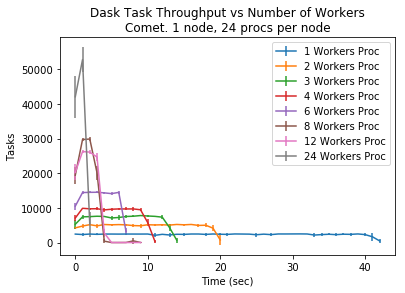

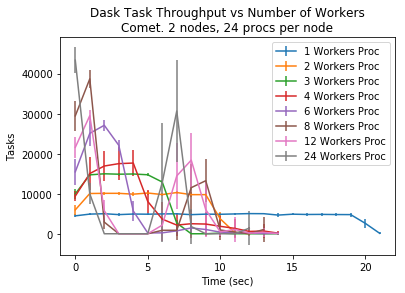

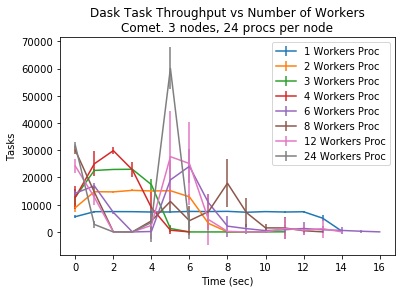

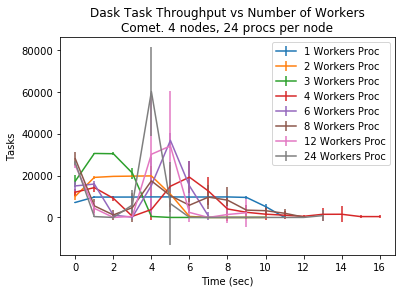

In [10]:
plt.figure()
plt.errorbar(range(0,DistHistC24_1p_1.shape[1]),DistHistC24_1p_1.mean(0),yerr=DistHistC24_1p_1.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC24_2p_1.shape[1]),DistHistC24_2p_1.mean(0),yerr=DistHistC24_2p_1.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC24_3p_1.shape[1]),DistHistC24_3p_1.mean(0),yerr=DistHistC24_3p_1.std(0),label='3 Workers Proc')
plt.errorbar(range(0,DistHistC24_4p_1.shape[1]),DistHistC24_4p_1.mean(0),yerr=DistHistC24_4p_1.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC24_6p_1.shape[1]),DistHistC24_6p_1.mean(0),yerr=DistHistC24_6p_1.std(0),label='6 Workers Proc')
plt.errorbar(range(0,DistHistC24_8p_1.shape[1]),DistHistC24_8p_1.mean(0),yerr=DistHistC24_8p_1.std(0),label='8 Workers Proc')
plt.errorbar(range(0,DistHistC24_12p_1.shape[1]),DistHistC24_12p_1.mean(0),yerr=DistHistC24_12p_1.std(0),label='12 Workers Proc')
plt.errorbar(range(0,DistHistC24_24p_1.shape[1]),DistHistC24_24p_1.mean(0),yerr=DistHistC24_24p_1.std(0),label='24 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 1 node, 24 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

plt.figure()
plt.errorbar(range(0,DistHistC24_1p_2.shape[1]),DistHistC24_1p_2.mean(0),yerr=DistHistC24_1p_2.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC24_2p_2.shape[1]),DistHistC24_2p_2.mean(0),yerr=DistHistC24_2p_2.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC24_3p_2.shape[1]),DistHistC24_3p_2.mean(0),yerr=DistHistC24_3p_2.std(0),label='3 Workers Proc')
plt.errorbar(range(0,DistHistC24_4p_2.shape[1]),DistHistC24_4p_2.mean(0),yerr=DistHistC24_4p_2.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC24_6p_2.shape[1]),DistHistC24_6p_2.mean(0),yerr=DistHistC24_6p_2.std(0),label='6 Workers Proc')
plt.errorbar(range(0,DistHistC24_8p_2.shape[1]),DistHistC24_8p_2.mean(0),yerr=DistHistC24_8p_2.std(0),label='8 Workers Proc')
plt.errorbar(range(0,DistHistC24_12p_2.shape[1]),DistHistC24_12p_2.mean(0),yerr=DistHistC24_12p_2.std(0),label='12 Workers Proc')
plt.errorbar(range(0,DistHistC24_24p_2.shape[1]),DistHistC24_24p_2.mean(0),yerr=DistHistC24_24p_2.std(0),label='24 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 2 nodes, 24 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed Comet
plt.figure()
plt.errorbar(range(0,DistHistC24_1p_3.shape[1]),DistHistC24_1p_3.mean(0),yerr=DistHistC24_1p_3.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC24_2p_3.shape[1]),DistHistC24_2p_3.mean(0),yerr=DistHistC24_2p_3.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC24_3p_3.shape[1]),DistHistC24_3p_3.mean(0),yerr=DistHistC24_3p_3.std(0),label='3 Workers Proc')
plt.errorbar(range(0,DistHistC24_4p_3.shape[1]),DistHistC24_4p_3.mean(0),yerr=DistHistC24_4p_3.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC24_6p_3.shape[1]),DistHistC24_6p_3.mean(0),yerr=DistHistC24_6p_3.std(0),label='6 Workers Proc')
plt.errorbar(range(0,DistHistC24_8p_3.shape[1]),DistHistC24_8p_3.mean(0),yerr=DistHistC24_8p_3.std(0),label='8 Workers Proc')
plt.errorbar(range(0,DistHistC24_12p_3.shape[1]),DistHistC24_12p_3.mean(0),yerr=DistHistC24_12p_3.std(0),label='12 Workers Proc')
plt.errorbar(range(0,DistHistC24_24p_3.shape[1]),DistHistC24_24p_3.mean(0),yerr=DistHistC24_24p_3.std(0),label='24 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 3 nodes, 24 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed Comet
plt.figure()
plt.errorbar(range(0,DistHistC24_1p_4.shape[1]),DistHistC24_1p_4.mean(0),yerr=DistHistC24_1p_4.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC24_2p_4.shape[1]),DistHistC24_2p_4.mean(0),yerr=DistHistC24_2p_4.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC24_3p_4.shape[1]),DistHistC24_3p_4.mean(0),yerr=DistHistC24_3p_4.std(0),label='3 Workers Proc')
plt.errorbar(range(0,DistHistC24_4p_4.shape[1]),DistHistC24_4p_4.mean(0),yerr=DistHistC24_4p_4.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC24_6p_4.shape[1]),DistHistC24_6p_4.mean(0),yerr=DistHistC24_6p_4.std(0),label='6 Workers Proc')
plt.errorbar(range(0,DistHistC24_8p_4.shape[1]),DistHistC24_8p_4.mean(0),yerr=DistHistC24_8p_4.std(0),label='8 Workers Proc')
plt.errorbar(range(0,DistHistC24_12p_4.shape[1]),DistHistC24_12p_4.mean(0),yerr=DistHistC24_12p_4.std(0),label='12 Workers Proc')
plt.errorbar(range(0,DistHistC24_24p_4.shape[1]),DistHistC24_24p_4.mean(0),yerr=DistHistC24_24p_4.std(0),label='24 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 4 nodes, 24 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

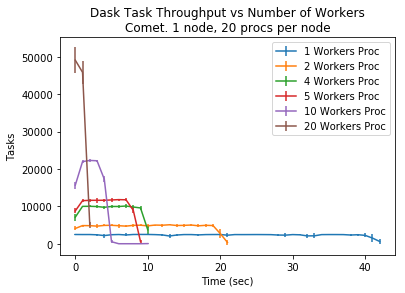

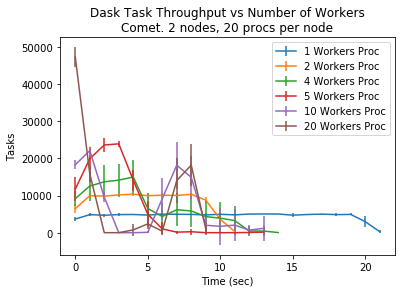

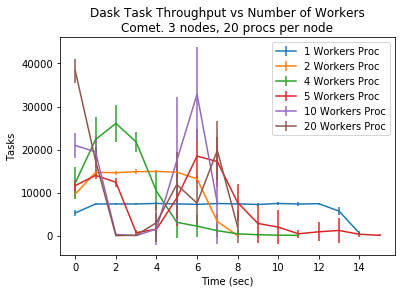

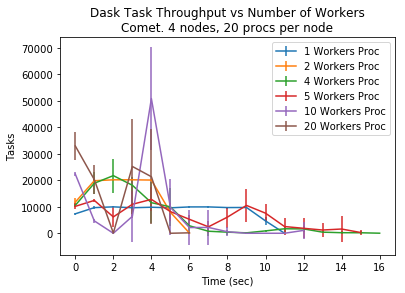

In [11]:
plt.figure()
plt.errorbar(range(0,DistHistC20_1p_1.shape[1]),DistHistC20_1p_1.mean(0),yerr=DistHistC20_1p_1.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC20_2p_1.shape[1]),DistHistC20_2p_1.mean(0),yerr=DistHistC20_2p_1.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC20_4p_1.shape[1]),DistHistC20_4p_1.mean(0),yerr=DistHistC20_4p_1.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC20_5p_1.shape[1]),DistHistC20_5p_1.mean(0),yerr=DistHistC20_5p_1.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistC20_10p_1.shape[1]),DistHistC20_10p_1.mean(0),yerr=DistHistC20_10p_1.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistC20_20p_1.shape[1]),DistHistC20_20p_1.mean(0),yerr=DistHistC20_20p_1.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 1 node, 20 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

plt.figure()
plt.errorbar(range(0,DistHistC20_1p_2.shape[1]),DistHistC20_1p_2.mean(0),yerr=DistHistC20_1p_2.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC20_2p_2.shape[1]),DistHistC20_2p_2.mean(0),yerr=DistHistC20_2p_2.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC20_4p_2.shape[1]),DistHistC20_4p_2.mean(0),yerr=DistHistC20_4p_2.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC20_5p_2.shape[1]),DistHistC20_5p_2.mean(0),yerr=DistHistC20_5p_2.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistC20_10p_2.shape[1]),DistHistC20_10p_2.mean(0),yerr=DistHistC20_10p_2.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistC20_20p_2.shape[1]),DistHistC20_20p_2.mean(0),yerr=DistHistC20_20p_2.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 2 nodes, 20 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed Comet
plt.figure()
plt.errorbar(range(0,DistHistC20_1p_3.shape[1]),DistHistC20_1p_3.mean(0),yerr=DistHistC20_1p_3.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC20_2p_3.shape[1]),DistHistC20_2p_3.mean(0),yerr=DistHistC20_2p_3.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC20_4p_3.shape[1]),DistHistC20_4p_3.mean(0),yerr=DistHistC20_4p_3.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC20_5p_3.shape[1]),DistHistC20_5p_3.mean(0),yerr=DistHistC20_5p_3.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistC20_10p_3.shape[1]),DistHistC20_10p_3.mean(0),yerr=DistHistC20_10p_3.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistC20_20p_3.shape[1]),DistHistC20_20p_3.mean(0),yerr=DistHistC20_20p_3.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 3 nodes, 20 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed Comet
plt.figure()
plt.errorbar(range(0,DistHistC20_1p_4.shape[1]),DistHistC20_1p_4.mean(0),yerr=DistHistC20_1p_4.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistC20_2p_4.shape[1]),DistHistC20_2p_4.mean(0),yerr=DistHistC20_2p_4.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistC20_4p_4.shape[1]),DistHistC20_4p_4.mean(0),yerr=DistHistC20_4p_4.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistC20_5p_4.shape[1]),DistHistC20_5p_4.mean(0),yerr=DistHistC20_5p_4.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistC20_10p_4.shape[1]),DistHistC20_10p_4.mean(0),yerr=DistHistC20_10p_4.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistC20_20p_4.shape[1]),DistHistC20_20p_4.mean(0),yerr=DistHistC20_20p_4.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nComet. 4 nodes, 20 procs per node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

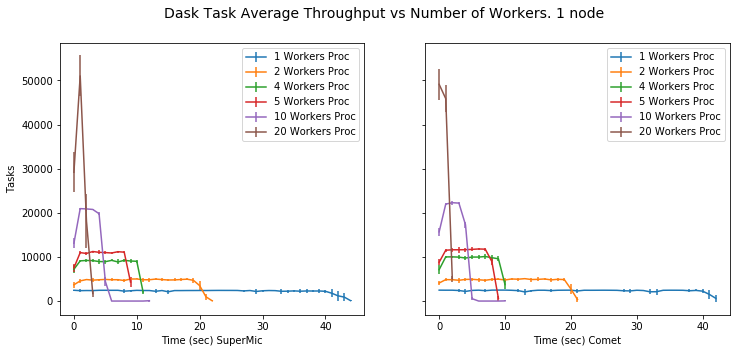

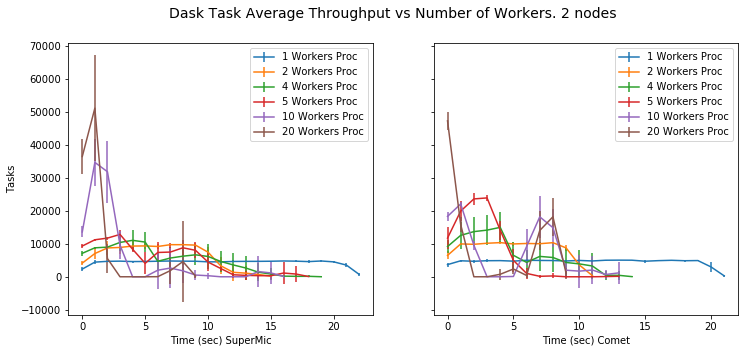

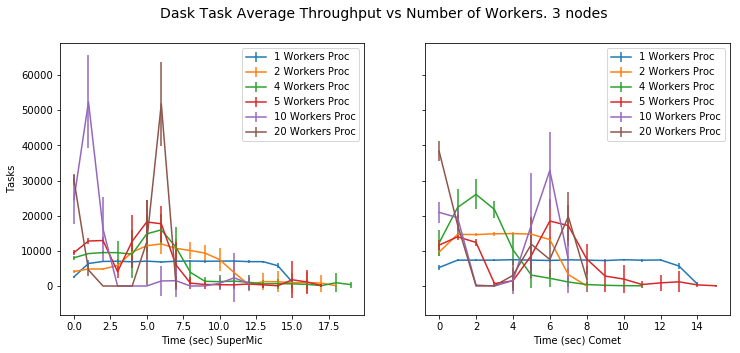

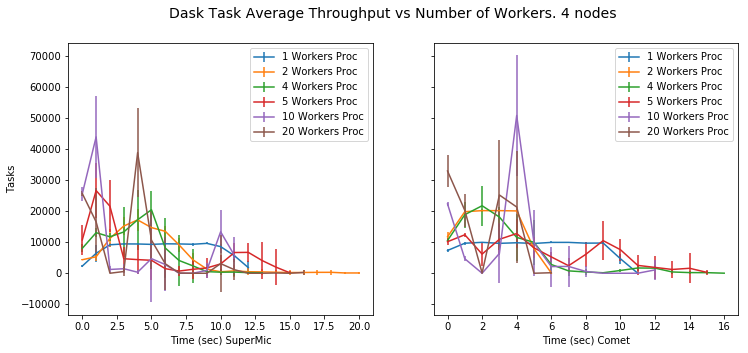

In [12]:
fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistS_1p_1.shape[1]),DistHistS_1p_1.mean(0),yerr=DistHistS_1p_1.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistS_2p_1.shape[1]),DistHistS_2p_1.mean(0),yerr=DistHistS_2p_1.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistS_4p_1.shape[1]),DistHistS_4p_1.mean(0),yerr=DistHistS_4p_1.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistS_5p_1.shape[1]),DistHistS_5p_1.mean(0),yerr=DistHistS_5p_1.std(0),label='5 Workers Proc')
axes[0].errorbar(range(0,DistHistS_10p_1.shape[1]),DistHistS_10p_1.mean(0),yerr=DistHistS_10p_1.std(0),label='10 Workers Proc')
axes[0].errorbar(range(0,DistHistS_20p_1.shape[1]),DistHistS_20p_1.mean(0),yerr=DistHistS_20p_1.std(0),label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_1.shape[1]),DistHistC20_1p_1.mean(0),yerr=DistHistC20_1p_1.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_1.shape[1]),DistHistC20_2p_1.mean(0),yerr=DistHistC20_2p_1.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_1.shape[1]),DistHistC20_4p_1.mean(0),yerr=DistHistC20_4p_1.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_1.shape[1]),DistHistC20_5p_1.mean(0),yerr=DistHistC20_5p_1.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_1.shape[1]),DistHistC20_10p_1.mean(0),yerr=DistHistC20_10p_1.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_1.shape[1]),DistHistC20_20p_1.mean(0),yerr=DistHistC20_20p_1.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 1 node',fontsize=14)
plt.savefig('daskAverThputvsProcsCometSup1node.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsCometSup1node.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistS_1p_2.shape[1]),DistHistS_1p_2.mean(0),yerr=DistHistS_1p_2.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistS_2p_2.shape[1]),DistHistS_2p_2.mean(0),yerr=DistHistS_2p_2.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistS_4p_2.shape[1]),DistHistS_4p_2.mean(0),yerr=DistHistS_4p_2.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistS_5p_2.shape[1]),DistHistS_5p_2.mean(0),yerr=DistHistS_5p_2.std(0),label='5 Workers Proc')
axes[0].errorbar(range(0,DistHistS_10p_2.shape[1]),DistHistS_10p_2.mean(0),yerr=DistHistS_10p_2.std(0),label='10 Workers Proc')
axes[0].errorbar(range(0,DistHistS_20p_2.shape[1]),DistHistS_20p_2.mean(0),yerr=DistHistS_20p_2.std(0),label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_2.shape[1]),DistHistC20_1p_2.mean(0),yerr=DistHistC20_1p_2.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_2.shape[1]),DistHistC20_2p_2.mean(0),yerr=DistHistC20_2p_2.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_2.shape[1]),DistHistC20_4p_2.mean(0),yerr=DistHistC20_4p_2.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_2.shape[1]),DistHistC20_5p_2.mean(0),yerr=DistHistC20_5p_2.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_2.shape[1]),DistHistC20_10p_2.mean(0),yerr=DistHistC20_10p_2.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_2.shape[1]),DistHistC20_20p_2.mean(0),yerr=DistHistC20_20p_2.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 2 nodes',fontsize=14)
plt.savefig('daskAverThputvsProcsCometSup2nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsCometSup2nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistS_1p_3.shape[1]),DistHistS_1p_3.mean(0),yerr=DistHistS_1p_3.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistS_2p_3.shape[1]),DistHistS_2p_3.mean(0),yerr=DistHistS_2p_3.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistS_4p_3.shape[1]),DistHistS_4p_3.mean(0),yerr=DistHistS_4p_3.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistS_5p_3.shape[1]),DistHistS_5p_3.mean(0),yerr=DistHistS_5p_3.std(0),label='5 Workers Proc')
axes[0].errorbar(range(0,DistHistS_10p_3.shape[1]),DistHistS_10p_3.mean(0),yerr=DistHistS_10p_3.std(0),label='10 Workers Proc')
axes[0].errorbar(range(0,DistHistS_20p_3.shape[1]),DistHistS_20p_3.mean(0),yerr=DistHistS_20p_3.std(0),label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_3.shape[1]),DistHistC20_1p_3.mean(0),yerr=DistHistC20_1p_3.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_3.shape[1]),DistHistC20_2p_3.mean(0),yerr=DistHistC20_2p_3.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_3.shape[1]),DistHistC20_4p_3.mean(0),yerr=DistHistC20_4p_3.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_3.shape[1]),DistHistC20_5p_3.mean(0),yerr=DistHistC20_5p_3.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_3.shape[1]),DistHistC20_10p_3.mean(0),yerr=DistHistC20_10p_3.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_3.shape[1]),DistHistC20_20p_3.mean(0),yerr=DistHistC20_20p_3.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 3 nodes',fontsize=14)
plt.savefig('daskAverThputvsProcsCometSup3nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsCometSup3nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistS_1p_4.shape[1]),DistHistS_1p_4.mean(0),yerr=DistHistS_1p_4.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistS_2p_4.shape[1]),DistHistS_2p_4.mean(0),yerr=DistHistS_2p_4.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistS_4p_4.shape[1]),DistHistS_4p_4.mean(0),yerr=DistHistS_4p_4.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistS_5p_4.shape[1]),DistHistS_5p_4.mean(0),yerr=DistHistS_5p_4.std(0),label='5 Workers Proc')
axes[0].errorbar(range(0,DistHistS_10p_4.shape[1]),DistHistS_10p_4.mean(0),yerr=DistHistS_10p_4.std(0),label='10 Workers Proc')
axes[0].errorbar(range(0,DistHistS_20p_4.shape[1]),DistHistS_20p_4.mean(0),yerr=DistHistS_20p_4.std(0),label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_4.shape[1]),DistHistC20_1p_4.mean(0),yerr=DistHistC20_1p_4.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_4.shape[1]),DistHistC20_2p_4.mean(0),yerr=DistHistC20_2p_4.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_4.shape[1]),DistHistC20_4p_4.mean(0),yerr=DistHistC20_4p_4.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_4.shape[1]),DistHistC20_5p_4.mean(0),yerr=DistHistC20_5p_4.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_4.shape[1]),DistHistC20_10p_4.mean(0),yerr=DistHistC20_10p_4.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_4.shape[1]),DistHistC20_20p_4.mean(0),yerr=DistHistC20_20p_4.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 4 nodes',fontsize=14)
plt.savefig('daskAverThputvsProcsCometSup4nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsCometSup4nodes.png',dpi=800,bbox_inches='tight')

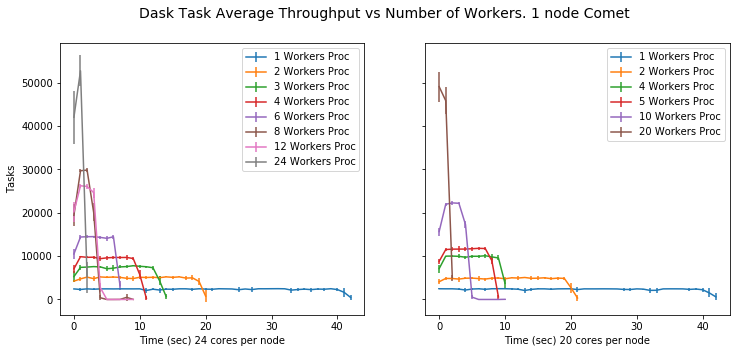

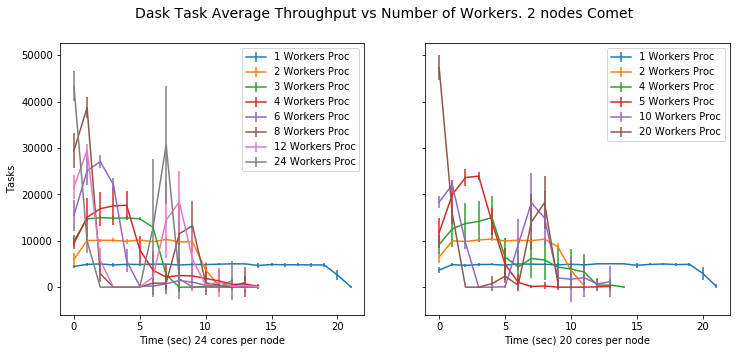

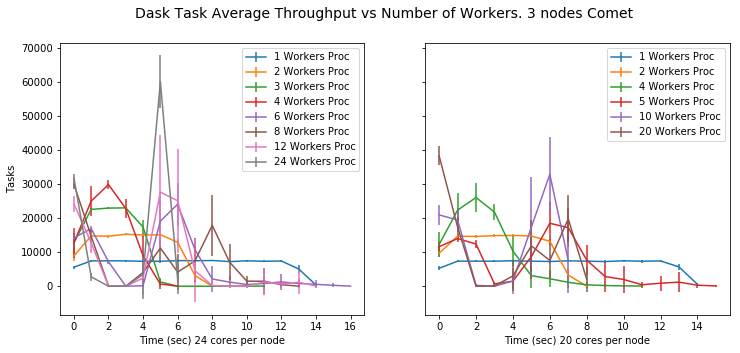

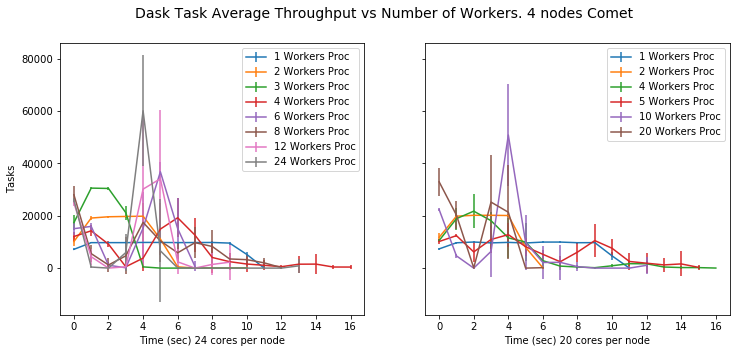

In [13]:
fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistC24_1p_1.shape[1]),DistHistC24_1p_1.mean(0),yerr=DistHistC24_1p_1.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_2p_1.shape[1]),DistHistC24_2p_1.mean(0),yerr=DistHistC24_2p_1.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_3p_1.shape[1]),DistHistC24_3p_1.mean(0),yerr=DistHistC24_3p_1.std(0),label='3 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_4p_1.shape[1]),DistHistC24_4p_1.mean(0),yerr=DistHistC24_4p_1.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_6p_1.shape[1]),DistHistC24_6p_1.mean(0),yerr=DistHistC24_6p_1.std(0),label='6 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_8p_1.shape[1]),DistHistC24_8p_1.mean(0),yerr=DistHistC24_8p_1.std(0),label='8 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_12p_1.shape[1]),DistHistC24_12p_1.mean(0),yerr=DistHistC24_12p_1.std(0),label='12 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_24p_1.shape[1]),DistHistC24_24p_1.mean(0),yerr=DistHistC24_24p_1.std(0),label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_1.shape[1]),DistHistC20_1p_1.mean(0),yerr=DistHistC20_1p_1.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_1.shape[1]),DistHistC20_2p_1.mean(0),yerr=DistHistC20_2p_1.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_1.shape[1]),DistHistC20_4p_1.mean(0),yerr=DistHistC20_4p_1.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_1.shape[1]),DistHistC20_5p_1.mean(0),yerr=DistHistC20_5p_1.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_1.shape[1]),DistHistC20_10p_1.mean(0),yerr=DistHistC20_10p_1.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_1.shape[1]),DistHistC20_20p_1.mean(0),yerr=DistHistC20_20p_1.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 1 node Comet',fontsize=14)
plt.savefig('daskAverThputvsProcsComet1node.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsComet1node.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistC24_1p_2.shape[1]),DistHistC24_1p_2.mean(0),yerr=DistHistC24_1p_2.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_2p_2.shape[1]),DistHistC24_2p_2.mean(0),yerr=DistHistC24_2p_2.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_3p_2.shape[1]),DistHistC24_3p_2.mean(0),yerr=DistHistC24_3p_2.std(0),label='3 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_4p_2.shape[1]),DistHistC24_4p_2.mean(0),yerr=DistHistC24_4p_2.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_6p_2.shape[1]),DistHistC24_6p_2.mean(0),yerr=DistHistC24_6p_2.std(0),label='6 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_8p_2.shape[1]),DistHistC24_8p_2.mean(0),yerr=DistHistC24_8p_2.std(0),label='8 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_12p_2.shape[1]),DistHistC24_12p_2.mean(0),yerr=DistHistC24_12p_2.std(0),label='12 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_24p_2.shape[1]),DistHistC24_24p_2.mean(0),yerr=DistHistC24_24p_2.std(0),label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_2.shape[1]),DistHistC20_1p_2.mean(0),yerr=DistHistC20_1p_2.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_2.shape[1]),DistHistC20_2p_2.mean(0),yerr=DistHistC20_2p_2.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_2.shape[1]),DistHistC20_4p_2.mean(0),yerr=DistHistC20_4p_2.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_2.shape[1]),DistHistC20_5p_2.mean(0),yerr=DistHistC20_5p_2.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_2.shape[1]),DistHistC20_10p_2.mean(0),yerr=DistHistC20_10p_2.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_2.shape[1]),DistHistC20_20p_2.mean(0),yerr=DistHistC20_20p_2.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 2 nodes Comet',fontsize=14)
plt.savefig('daskAverThputvsProcsComet2nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsComet2nodes.png',dpi=800,bbox_inches='tight')



fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistC24_1p_3.shape[1]),DistHistC24_1p_3.mean(0),yerr=DistHistC24_1p_3.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_2p_3.shape[1]),DistHistC24_2p_3.mean(0),yerr=DistHistC24_2p_3.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_3p_3.shape[1]),DistHistC24_3p_3.mean(0),yerr=DistHistC24_3p_3.std(0),label='3 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_4p_3.shape[1]),DistHistC24_4p_3.mean(0),yerr=DistHistC24_4p_3.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_6p_3.shape[1]),DistHistC24_6p_3.mean(0),yerr=DistHistC24_6p_3.std(0),label='6 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_8p_3.shape[1]),DistHistC24_8p_3.mean(0),yerr=DistHistC24_8p_3.std(0),label='8 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_12p_3.shape[1]),DistHistC24_12p_3.mean(0),yerr=DistHistC24_12p_3.std(0),label='12 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_24p_3.shape[1]),DistHistC24_24p_3.mean(0),yerr=DistHistC24_24p_3.std(0),label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_3.shape[1]),DistHistC20_1p_3.mean(0),yerr=DistHistC20_1p_3.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_3.shape[1]),DistHistC20_2p_3.mean(0),yerr=DistHistC20_2p_3.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_3.shape[1]),DistHistC20_4p_3.mean(0),yerr=DistHistC20_4p_3.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_3.shape[1]),DistHistC20_5p_3.mean(0),yerr=DistHistC20_5p_3.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_3.shape[1]),DistHistC20_10p_3.mean(0),yerr=DistHistC20_10p_3.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_3.shape[1]),DistHistC20_20p_3.mean(0),yerr=DistHistC20_20p_3.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 3 nodes Comet',fontsize=14)
plt.savefig('daskAverThputvsProcsComet3nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsComet3nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].errorbar(range(0,DistHistC24_1p_4.shape[1]),DistHistC24_1p_4.mean(0),yerr=DistHistC24_1p_4.std(0),label='1 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_2p_4.shape[1]),DistHistC24_2p_4.mean(0),yerr=DistHistC24_2p_4.std(0),label='2 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_3p_4.shape[1]),DistHistC24_3p_4.mean(0),yerr=DistHistC24_3p_4.std(0),label='3 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_4p_4.shape[1]),DistHistC24_4p_4.mean(0),yerr=DistHistC24_4p_4.std(0),label='4 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_6p_4.shape[1]),DistHistC24_6p_4.mean(0),yerr=DistHistC24_6p_4.std(0),label='6 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_8p_4.shape[1]),DistHistC24_8p_4.mean(0),yerr=DistHistC24_8p_4.std(0),label='8 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_12p_4.shape[1]),DistHistC24_12p_4.mean(0),yerr=DistHistC24_12p_4.std(0),label='12 Workers Proc')
axes[0].errorbar(range(0,DistHistC24_24p_4.shape[1]),DistHistC24_24p_4.mean(0),yerr=DistHistC24_24p_4.std(0),label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].errorbar(range(0,DistHistC20_1p_4.shape[1]),DistHistC20_1p_4.mean(0),yerr=DistHistC20_1p_4.std(0),label='1 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_2p_4.shape[1]),DistHistC20_2p_4.mean(0),yerr=DistHistC20_2p_4.std(0),label='2 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_4p_4.shape[1]),DistHistC20_4p_4.mean(0),yerr=DistHistC20_4p_4.std(0),label='4 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_5p_4.shape[1]),DistHistC20_5p_4.mean(0),yerr=DistHistC20_5p_4.std(0),label='5 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_10p_4.shape[1]),DistHistC20_10p_4.mean(0),yerr=DistHistC20_10p_4.std(0),label='10 Workers Proc')
axes[1].errorbar(range(0,DistHistC20_20p_4.shape[1]),DistHistC20_20p_4.mean(0),yerr=DistHistC20_20p_4.std(0),label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Average Throughput vs Number of Workers. 4 nodes Comet',fontsize=14)
plt.savefig('daskAverThputvsProcsComet4nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskAverThputvsProcsCometnodes.png',dpi=800,bbox_inches='tight')

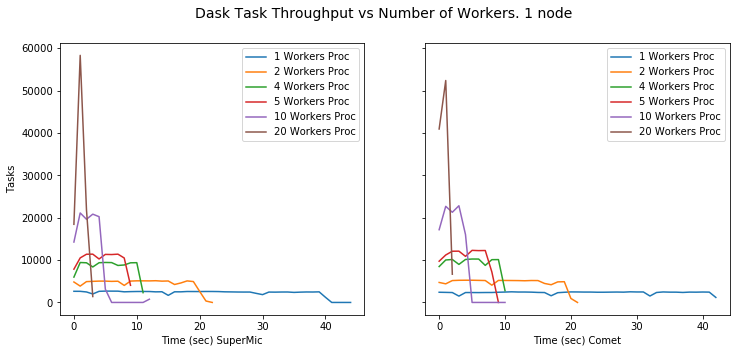

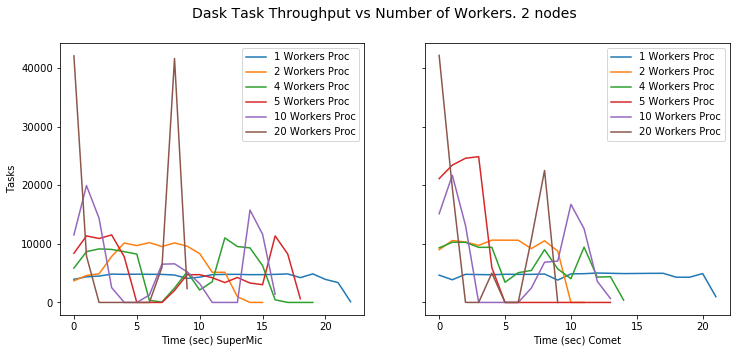

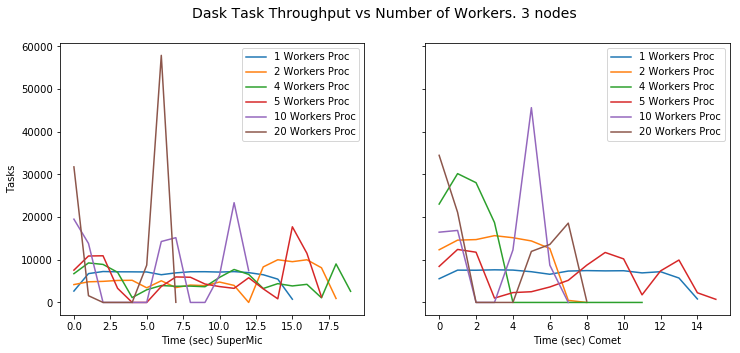

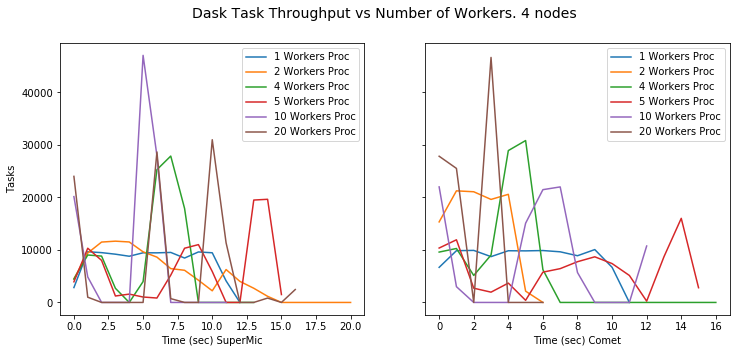

In [14]:
fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistS_1p_1.shape[1]),DistHistS_1p_1[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistS_2p_1.shape[1]),DistHistS_2p_1[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistS_4p_1.shape[1]),DistHistS_4p_1[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistS_5p_1.shape[1]),DistHistS_5p_1[0,:],label='5 Workers Proc')
axes[0].plot(range(0,DistHistS_10p_1.shape[1]),DistHistS_10p_1[0,:],label='10 Workers Proc')
axes[0].plot(range(0,DistHistS_20p_1.shape[1]),DistHistS_20p_1[0,:],label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_1.shape[1]),DistHistC20_1p_1[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_1.shape[1]),DistHistC20_2p_1[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_1.shape[1]),DistHistC20_4p_1[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_1.shape[1]),DistHistC20_5p_1[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_1.shape[1]),DistHistC20_10p_1[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_1.shape[1]),DistHistC20_20p_1[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 1 node',fontsize=14)
plt.savefig('daskThputvsProcsCometSup1node.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsCometSup1node.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistS_1p_2.shape[1]),DistHistS_1p_2[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistS_2p_2.shape[1]),DistHistS_2p_2[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistS_4p_2.shape[1]),DistHistS_4p_2[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistS_5p_2.shape[1]),DistHistS_5p_2[0,:],label='5 Workers Proc')
axes[0].plot(range(0,DistHistS_10p_2.shape[1]),DistHistS_10p_2[0,:],label='10 Workers Proc')
axes[0].plot(range(0,DistHistS_20p_2.shape[1]),DistHistS_20p_2[0,:],label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_2.shape[1]),DistHistC20_1p_2[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_2.shape[1]),DistHistC20_2p_2[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_2.shape[1]),DistHistC20_4p_2[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_2.shape[1]),DistHistC20_5p_2[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_2.shape[1]),DistHistC20_10p_2[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_2.shape[1]),DistHistC20_20p_2[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 2 nodes',fontsize=14)
plt.savefig('daskThputvsProcsCometSup2nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsCometSup2nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistS_1p_3.shape[1]),DistHistS_1p_3[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistS_2p_3.shape[1]),DistHistS_2p_3[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistS_4p_3.shape[1]),DistHistS_4p_3[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistS_5p_3.shape[1]),DistHistS_5p_3[0,:],label='5 Workers Proc')
axes[0].plot(range(0,DistHistS_10p_3.shape[1]),DistHistS_10p_3[0,:],label='10 Workers Proc')
axes[0].plot(range(0,DistHistS_20p_3.shape[1]),DistHistS_20p_3[0,:],label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_3.shape[1]),DistHistC20_1p_3[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_3.shape[1]),DistHistC20_2p_3[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_3.shape[1]),DistHistC20_4p_3[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_3.shape[1]),DistHistC20_5p_3[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_3.shape[1]),DistHistC20_10p_3[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_3.shape[1]),DistHistC20_20p_3[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 3 nodes',fontsize=14)
plt.savefig('daskThputvsProcsCometSup3nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsCometSup3nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistS_1p_4.shape[1]),DistHistS_1p_4[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistS_2p_4.shape[1]),DistHistS_2p_4[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistS_4p_4.shape[1]),DistHistS_4p_4[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistS_5p_4.shape[1]),DistHistS_5p_4[0,:],label='5 Workers Proc')
axes[0].plot(range(0,DistHistS_10p_4.shape[1]),DistHistS_10p_4[0,:],label='10 Workers Proc')
axes[0].plot(range(0,DistHistS_20p_4.shape[1]),DistHistS_20p_4[0,:],label='20 Workers Proc')
axes[0].set_xlabel('Time (sec) SuperMic')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_4.shape[1]),DistHistC20_1p_4[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_4.shape[1]),DistHistC20_2p_4[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_4.shape[1]),DistHistC20_4p_4[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_4.shape[1]),DistHistC20_5p_4[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_4.shape[1]),DistHistC20_10p_4[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_4.shape[1]),DistHistC20_20p_4[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) Comet')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 4 nodes',fontsize=14)
plt.savefig('daskThputvsProcsCometSup4nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsCometSup4nodes.png',dpi=800,bbox_inches='tight')

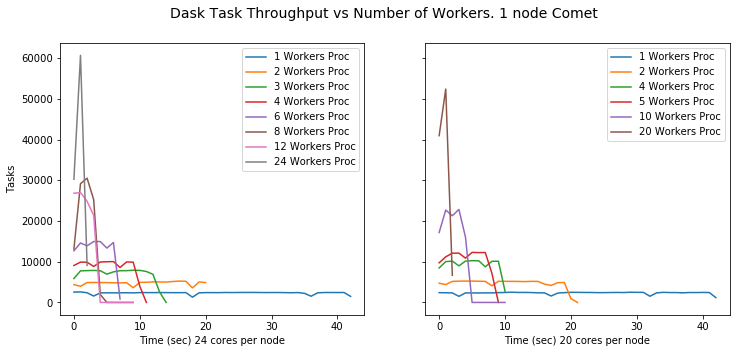

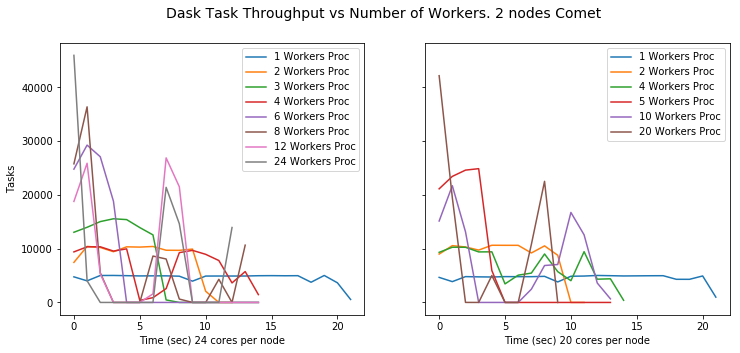

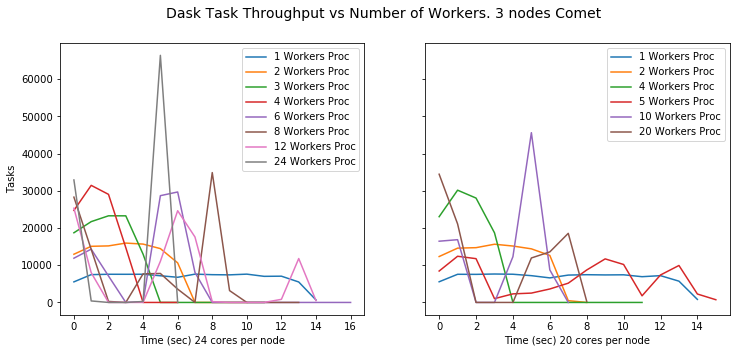

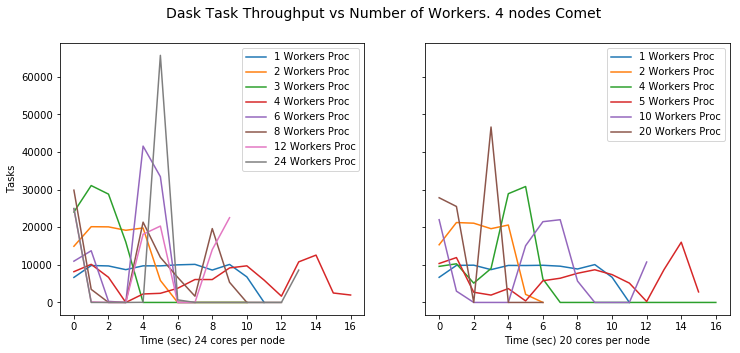

In [15]:
fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistC24_1p_1.shape[1]),DistHistC24_1p_1[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistC24_2p_1.shape[1]),DistHistC24_2p_1[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistC24_3p_1.shape[1]),DistHistC24_3p_1[0,:],label='3 Workers Proc')
axes[0].plot(range(0,DistHistC24_4p_1.shape[1]),DistHistC24_4p_1[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistC24_6p_1.shape[1]),DistHistC24_6p_1[0,:],label='6 Workers Proc')
axes[0].plot(range(0,DistHistC24_8p_1.shape[1]),DistHistC24_8p_1[0,:],label='8 Workers Proc')
axes[0].plot(range(0,DistHistC24_12p_1.shape[1]),DistHistC24_12p_1[0,:],label='12 Workers Proc')
axes[0].plot(range(0,DistHistC24_24p_1.shape[1]),DistHistC24_24p_1[0,:],label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_1.shape[1]),DistHistC20_1p_1[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_1.shape[1]),DistHistC20_2p_1[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_1.shape[1]),DistHistC20_4p_1[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_1.shape[1]),DistHistC20_5p_1[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_1.shape[1]),DistHistC20_10p_1[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_1.shape[1]),DistHistC20_20p_1[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 1 node Comet',fontsize=14)
plt.savefig('daskThputvsProcsComet1node.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsComet1node.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistC24_1p_2.shape[1]),DistHistC24_1p_2[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistC24_2p_2.shape[1]),DistHistC24_2p_2[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistC24_3p_2.shape[1]),DistHistC24_3p_2[0,:],label='3 Workers Proc')
axes[0].plot(range(0,DistHistC24_4p_2.shape[1]),DistHistC24_4p_2[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistC24_6p_2.shape[1]),DistHistC24_6p_2[0,:],label='6 Workers Proc')
axes[0].plot(range(0,DistHistC24_8p_2.shape[1]),DistHistC24_8p_2[0,:],label='8 Workers Proc')
axes[0].plot(range(0,DistHistC24_12p_2.shape[1]),DistHistC24_12p_2[0,:],label='12 Workers Proc')
axes[0].plot(range(0,DistHistC24_24p_2.shape[1]),DistHistC24_24p_2[0,:],label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_2.shape[1]),DistHistC20_1p_2[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_2.shape[1]),DistHistC20_2p_2[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_2.shape[1]),DistHistC20_4p_2[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_2.shape[1]),DistHistC20_5p_2[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_2.shape[1]),DistHistC20_10p_2[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_2.shape[1]),DistHistC20_20p_2[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 2 nodes Comet',fontsize=14)
plt.savefig('daskThputvsProcsComet2nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsComet2nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistC24_1p_3.shape[1]),DistHistC24_1p_3[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistC24_2p_3.shape[1]),DistHistC24_2p_3[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistC24_3p_3.shape[1]),DistHistC24_3p_3[0,:],label='3 Workers Proc')
axes[0].plot(range(0,DistHistC24_4p_3.shape[1]),DistHistC24_4p_3[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistC24_6p_3.shape[1]),DistHistC24_6p_3[0,:],label='6 Workers Proc')
axes[0].plot(range(0,DistHistC24_8p_3.shape[1]),DistHistC24_8p_3[0,:],label='8 Workers Proc')
axes[0].plot(range(0,DistHistC24_12p_3.shape[1]),DistHistC24_12p_3[0,:],label='12 Workers Proc')
axes[0].plot(range(0,DistHistC24_24p_3.shape[1]),DistHistC24_24p_3[0,:],label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_3.shape[1]),DistHistC20_1p_3[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_3.shape[1]),DistHistC20_2p_3[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_3.shape[1]),DistHistC20_4p_3[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_3.shape[1]),DistHistC20_5p_3[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_3.shape[1]),DistHistC20_10p_3[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_3.shape[1]),DistHistC20_20p_3[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 3 nodes Comet',fontsize=14)
plt.savefig('daskThputvsProcsComet3nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsComet3nodes.png',dpi=800,bbox_inches='tight')

fig,axes = plt.subplots(nrows=1, ncols=2,sharey='row')
fig.set_size_inches(12,5)
axes[0].plot(range(0,DistHistC24_1p_4.shape[1]),DistHistC24_1p_4[0,:],label='1 Workers Proc')
axes[0].plot(range(0,DistHistC24_2p_4.shape[1]),DistHistC24_2p_4[0,:],label='2 Workers Proc')
axes[0].plot(range(0,DistHistC24_3p_4.shape[1]),DistHistC24_3p_4[0,:],label='3 Workers Proc')
axes[0].plot(range(0,DistHistC24_4p_4.shape[1]),DistHistC24_4p_4[0,:],label='4 Workers Proc')
axes[0].plot(range(0,DistHistC24_6p_4.shape[1]),DistHistC24_6p_4[0,:],label='6 Workers Proc')
axes[0].plot(range(0,DistHistC24_8p_4.shape[1]),DistHistC24_8p_4[0,:],label='8 Workers Proc')
axes[0].plot(range(0,DistHistC24_12p_4.shape[1]),DistHistC24_12p_4[0,:],label='12 Workers Proc')
axes[0].plot(range(0,DistHistC24_24p_4.shape[1]),DistHistC24_24p_4[0,:],label='24 Workers Proc')
axes[0].set_xlabel('Time (sec) 24 cores per node')
axes[0].set_ylabel('Tasks')
axes[0].legend()
axes[1].plot(range(0,DistHistC20_1p_4.shape[1]),DistHistC20_1p_4[0,:],label='1 Workers Proc')
axes[1].plot(range(0,DistHistC20_2p_4.shape[1]),DistHistC20_2p_4[0,:],label='2 Workers Proc')
axes[1].plot(range(0,DistHistC20_4p_4.shape[1]),DistHistC20_4p_4[0,:],label='4 Workers Proc')
axes[1].plot(range(0,DistHistC20_5p_4.shape[1]),DistHistC20_5p_4[0,:],label='5 Workers Proc')
axes[1].plot(range(0,DistHistC20_10p_4.shape[1]),DistHistC20_10p_4[0,:],label='10 Workers Proc')
axes[1].plot(range(0,DistHistC20_20p_4.shape[1]),DistHistC20_20p_4[0,:],label='20 Workers Proc')
axes[1].set_xlabel('Time (sec) 20 cores per node')
axes[1].legend()
fig.suptitle('Dask Task Throughput vs Number of Workers. 4 nodes Comet',fontsize=14)
plt.savefig('daskThputvsProcsComet4nodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskThputvsProcsComet4nodes.png',dpi=800,bbox_inches='tight')